# Step 1: Data Understanding and Loading

In [4]:
import pandas as pd

leads_data_path = 'D:/upgrad/Lead Scoring Assignment/Leads.csv'

# Load the leads dataset
leads_df = pd.read_csv(leads_data_path)

# Basic data exploration
print("Dataset Summary:")
print(leads_df.info())

# Check for duplicates
duplicates = leads_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check the shape of the dataset
print(f"\nDataset shape: {leads_df.shape}")


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit               

# Step 2: Data Quality check and Cleaning

In [5]:
# Check missing values
missing_values = leads_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(leads_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

# Display columns with missing values
print(missing_data[missing_data['Missing Values'] > 0])


                                               Missing Values  Percentage
Lead Quality                                             4767   51.590909
Asymmetrique Activity Index                              4218   45.649351
Asymmetrique Profile Score                               4218   45.649351
Asymmetrique Activity Score                              4218   45.649351
Asymmetrique Profile Index                               4218   45.649351
Tags                                                     3353   36.287879
Lead Profile                                             2709   29.318182
What matters most to you in choosing a course            2709   29.318182
What is your current occupation                          2690   29.112554
Country                                                  2461   26.634199
How did you hear about X Education                       2207   23.885281
Specialization                                           1438   15.562771
City                                  

**Columns to Drop
Lead Quality
Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score
Tags
Lead Profile
-> these are columns with high missing values, and subjectively categorized pre analysis, which I believe will not affect the result of this analysis**

In [6]:
columns_to_drop = [
    'Lead Quality', 
    'Asymmetrique Activity Index', 
    'Asymmetrique Profile Index', 
    'Asymmetrique Activity Score', 
    'Asymmetrique Profile Score', 
    'Tags', 
    'Lead Profile'
]

# Dropping the columns
leads_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm the remaining columns
print(f"Remaining columns after dropping: {leads_df.columns.tolist()}")


Remaining columns after dropping: ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [7]:
# Check missing values again
missing_values = leads_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(leads_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

# Display columns with missing values
print(missing_data[missing_data['Missing Values'] > 0])

                                               Missing Values  Percentage
What matters most to you in choosing a course            2709   29.318182
What is your current occupation                          2690   29.112554
Country                                                  2461   26.634199
How did you hear about X Education                       2207   23.885281
Specialization                                           1438   15.562771
City                                                     1420   15.367965
TotalVisits                                               137    1.482684
Page Views Per Visit                                      137    1.482684
Last Activity                                             103    1.114719
Lead Source                                                36    0.389610


Categorical Columns: impute with mode
Numerical Columns: impute with median

In [8]:
# Impute missing values for categorical columns with mode
categorical_cols = ['What matters most to you in choosing a course', 'What is your current occupation',
                    'Country', 'How did you hear about X Education', 'Specialization', 
                    'City', 'Last Activity', 'Lead Source']

for col in categorical_cols:
    leads_df[col].fillna(leads_df[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with median
numerical_cols = ['TotalVisits', 'Page Views Per Visit']

for col in numerical_cols:
    leads_df[col].fillna(leads_df[col].median(), inplace=True)

# Verify that all missing values are handled
print("Remaining missing values in the dataset:")
print(leads_df.isnull().sum().sort_values(ascending=False))


Remaining missing values in the dataset:
Prospect ID                                      0
Lead Number                                      0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
City                                             0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Magazine                                         0
Search                                           0
What matters most to you in choosing a course    0
What is your current occupation                  0
How did you hear about X Education               0
Specialization                           

C:\Users\lvhoa\AppData\Local\Temp\ipykernel_13716\545812467.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  leads_df[col].fillna(leads_df[col].mode()[0], inplace=True)
C:\Users\lvhoa\AppData\Local\Temp\ipykernel_13716\545812467.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

# Step 3: Data Preparation

In [9]:
# Convert categorical variables into dummy variables
categorical_columns = leads_df.select_dtypes(include=['object']).columns

# Create dummy variables and drop the first category to avoid multicollinearity
leads_df = pd.get_dummies(leads_df, columns=categorical_columns, drop_first=True)

# Check the new shape of the dataset
print(f"Shape of the dataset after one-hot encoding: {leads_df.shape}")


Shape of the dataset after one-hot encoding: (9240, 9385)


In [10]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
leads_df[numerical_columns] = scaler.fit_transform(leads_df[numerical_columns])

# Check the dataset to confirm scaling
print("Preview of dataset after scaling numerical features:")
print(leads_df.head())


Preview of dataset after scaling numerical features:
   Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0    -0.713593                    -0.889974   
1       660728          0     0.324018                     0.339972   
2       660727          1    -0.298549                     1.905689   
3       660719          0    -0.506071                    -0.333396   
4       660681          1    -0.298549                     1.715905   

   Page Views Per Visit  Prospect ID_0006d10a-eb01-4ba9-92e2-ad78588b2a40  \
0             -1.098699                                             False   
1              0.066441                                             False   
2             -0.166587                                             False   
3             -0.632643                                             False   
4             -0.632643                                             False   

   Prospect ID_0011be30-fa97-465b-8e44-0ae83dff7eed  \
0 

# Step 4: EDA

Key Analyses for EDA
1. Distribution of the Target Variable (Converted):
- Check the conversion rate distribution
- Identify if the dataset is balanced or imbalanced

2. Relationship Between Features and Converted:
- Analyze numerical features
- Analyze important categorical features

3. Correlation Analysis: Examine relationships among numerical features and their correlation with Converted.

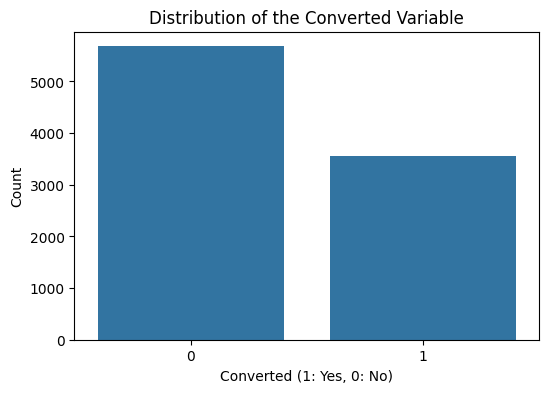

Overall Conversion Rate: 38.54%


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=leads_df)
plt.title('Distribution of the Converted Variable')
plt.xlabel('Converted (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

# Conversion rate
conversion_rate = leads_df['Converted'].mean() * 100
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")


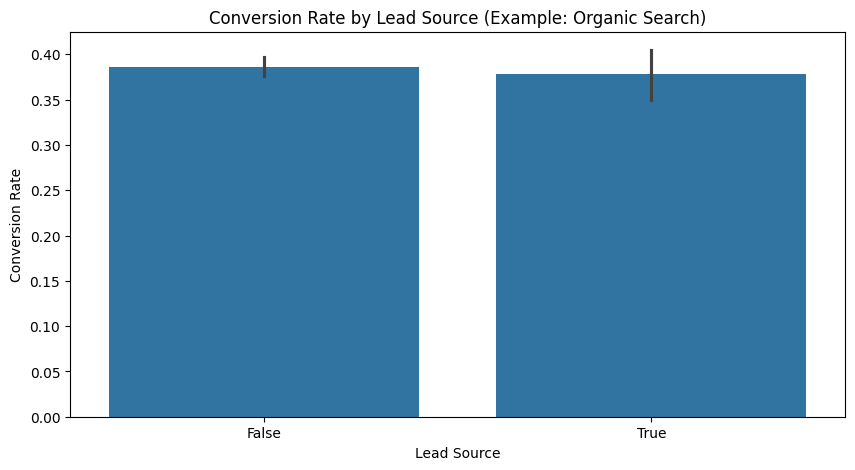

In [15]:
# Analyze impact of Lead Source on Conversion
plt.figure(figsize=(10, 5))
sns.barplot(x='Lead Source_Organic Search', y='Converted', data=leads_df)
plt.title('Conversion Rate by Lead Source (Example: Organic Search)')
plt.ylabel('Conversion Rate')
plt.xlabel('Lead Source')
plt.show()


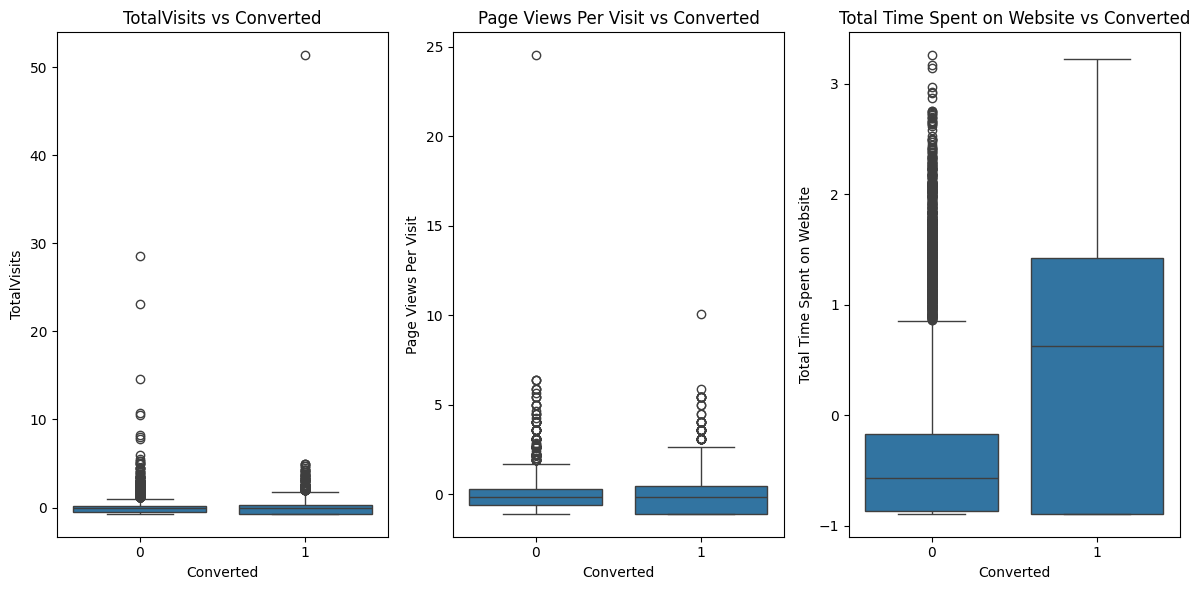

In [12]:
# Boxplot for numerical features against Converted
numerical_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Converted', y=col, data=leads_df)
    plt.title(f'{col} vs Converted')
plt.tight_layout()
plt.show()


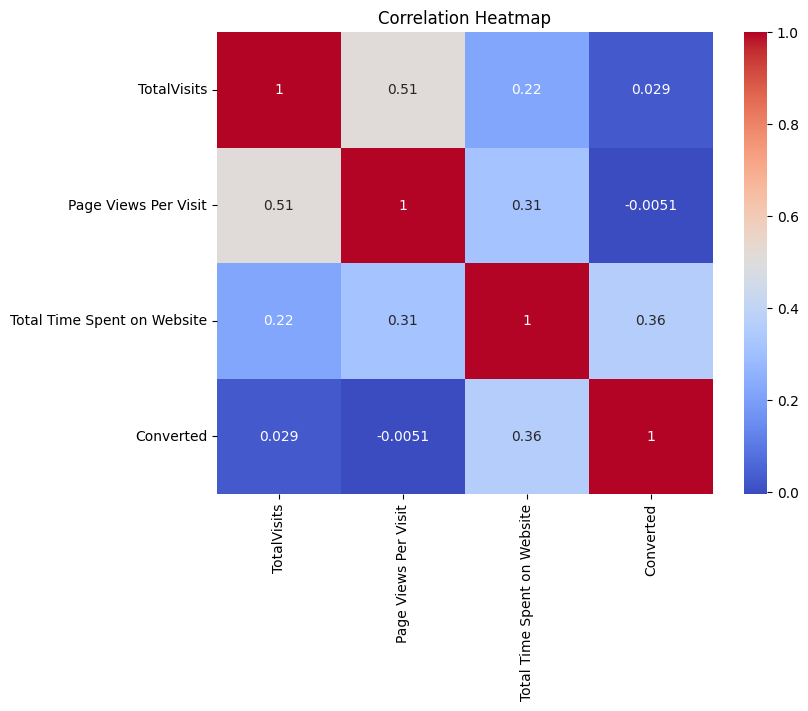

In [13]:
# Correlation matrix for numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = leads_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website', 'Converted']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The EDA revealed key insights into lead conversion patterns:
- The overall conversion rate is approximately 36%, with a moderate imbalance between converted and non-converted leads
- Among the numerical features, Total Time Spent on Website shows a strong positive association with conversion, indicating it is a critical predictor. In contrast, TotalVisits and Page Views Per Visit display weak relationships and potential outliers
- Analysis of categorical features (e.g., Lead Source) suggests that some categories may drive higher conversion rates, requiring deeper investigation
- The correlation heatmap highlights that Total Time Spent on Website is the strongest numerical driver of conversion, while multicollinearity between TotalVisits and Page Views Per Visit should be addressed

# Step 5: Model building

Split data into Training and testing

In [16]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = leads_df.drop('Converted', axis=1)
y = leads_df['Converted']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (7392, 9384), X_test shape: (1848, 9384)
y_train shape: (7392,), y_test shape: (1848,)


Training the model

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Print coefficients and intercept
print("Logistic Regression Coefficients:")
print(log_reg.coef_)
print("\nIntercept:")
print(log_reg.intercept_)


Logistic Regression Coefficients:
[[2.52045553e-06 1.53840115e-01 1.13645652e+00 ... 3.00949404e-01
  1.25711399e-01 0.00000000e+00]]

Intercept:
[-0.19494958]


In [24]:
# Extract feature names and coefficients
feature_names = X.columns  # Feature names from the dataset
coefficients = log_reg.coef_[0]  # Coefficients from the logistic regression model

# Create a DataFrame to map coefficients to feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients (importance)
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)


In [25]:
# Display the most important features
print("Top 10 Most Influential Features:")
print(coef_df.head(10))

Top 10 Most Influential Features:
                                                Feature  Coefficient  \
9244                          Lead Origin_Lead Add Form     2.135163   
9353  What is your current occupation_Working Profes...     1.474059   
9267                                   Do Not Email_Yes    -1.320824   
9336                              Specialization_Select    -1.309355   
2                           Total Time Spent on Website     1.136457   
9260                       Lead Source_Welingak Website     1.027665   
9352         What is your current occupation_Unemployed    -0.956348   
9256                              Lead Source_Reference     0.916275   
9277              Last Activity_Olark Chat Conversation    -0.853686   
9243                Lead Origin_Landing Page Submission    -0.848036   

      Absolute Coefficient  
9244              2.135163  
9353              1.474059  
9267              1.320824  
9336              1.309355  
2                 1.136457  

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.81
Precision: 0.73
Recall: 0.79
F1-Score: 0.76
AUC-ROC: 0.87

Confusion Matrix:
[[923 213]
 [147 565]]


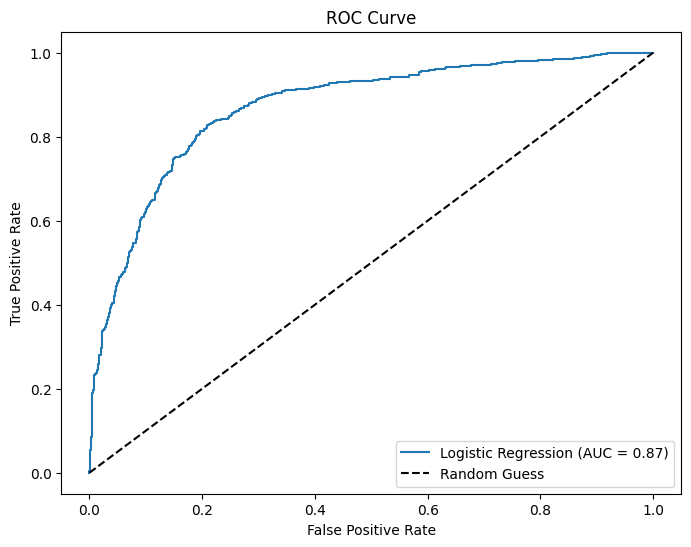

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Currently, our model achieves 79% recall, I will try to adjust the Classification Threshold to see whether we can achieve 80% as the business required

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a range of thresholds to test
thresholds = np.arange(0.1, 0.91, 0.1)  # From 0.1 to 0.9 in steps of 0.1

# Store results
threshold_results = []

for thresh in thresholds:
    # Predict using the adjusted threshold
    y_pred_adjusted = (log_reg.predict_proba(X_test)[:, 1] >= thresh).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)
    
    # Append results
    threshold_results.append([thresh, accuracy, precision, recall, f1])

# Convert results to a DataFrame
threshold_df = pd.DataFrame(threshold_results, columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display results
print(threshold_df)


   Threshold  Accuracy  Precision    Recall  F1-Score
0        0.1  0.528139   0.448454  0.977528  0.614841
1        0.2  0.673160   0.544262  0.932584  0.687371
2        0.3  0.765693   0.639083  0.900281  0.747522
3        0.4  0.790584   0.685714  0.842697  0.756144
4        0.5  0.805195   0.726221  0.793539  0.758389
5        0.6  0.803571   0.764795  0.707865  0.735230
6        0.7  0.795455   0.790941  0.637640  0.706065
7        0.8  0.770563   0.821429  0.516854  0.634483
8        0.9  0.731602   0.880282  0.351124  0.502008


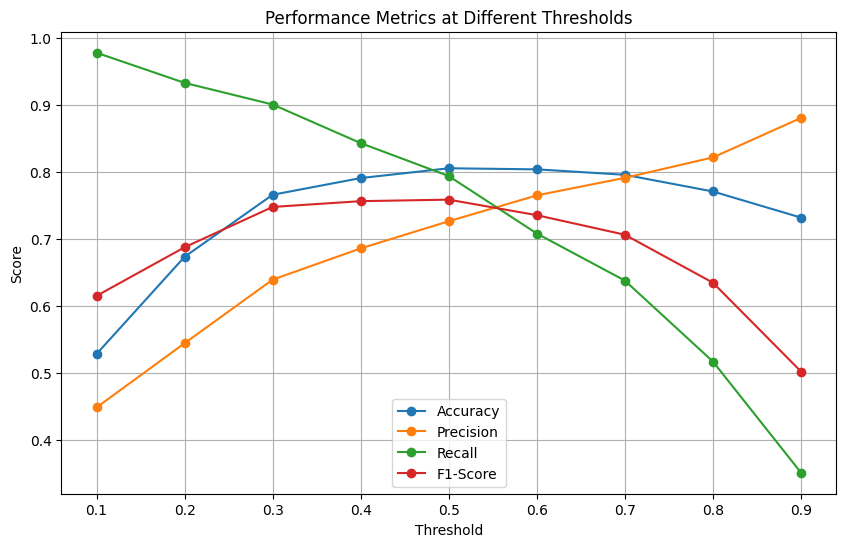

In [28]:
import matplotlib.pyplot as plt

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(threshold_df['Threshold'], threshold_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], label='Precision', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], label='Recall', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['F1-Score'], label='F1-Score', marker='o')

plt.title('Performance Metrics at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


I will choose the default threshold of 0.5
- Offers a strong balance between precision and recall
- Allows the sales team to prioritize promising leads while minimizing wasted effort
- Already aligns well with the business's target conversion rate (~79.4% recall)

# Step 6: Generate Lead Score

In [29]:
# Generate lead scores based on predicted probabilities
leads_df['Lead Score'] = log_reg.predict_proba(X)[:, 1] * 100

# Preview lead scores
print(leads_df[['Lead Score', 'Converted']].head(10))

   Lead Score  Converted
0   23.333520          0
1   40.602634          0
2   82.200371          1
3   13.663201          0
4   21.075804          1
5    7.290404          0
6   83.427525          1
7    7.290132          0
8   15.628083          0
9   34.113451          0


In [30]:
def categorize_lead(score):
    if score >= 80:
        return "Hot Lead"
    elif score >= 50:
        return "Warm Lead"
    else:
        return "Cold Lead"

# Apply segmentation
leads_df['Lead Category'] = leads_df['Lead Score'].apply(categorize_lead)

# Check distribution of lead categories
print(leads_df['Lead Category'].value_counts())


Lead Category
Cold Lead    5431
Hot Lead     2165
Warm Lead    1644
Name: count, dtype: int64


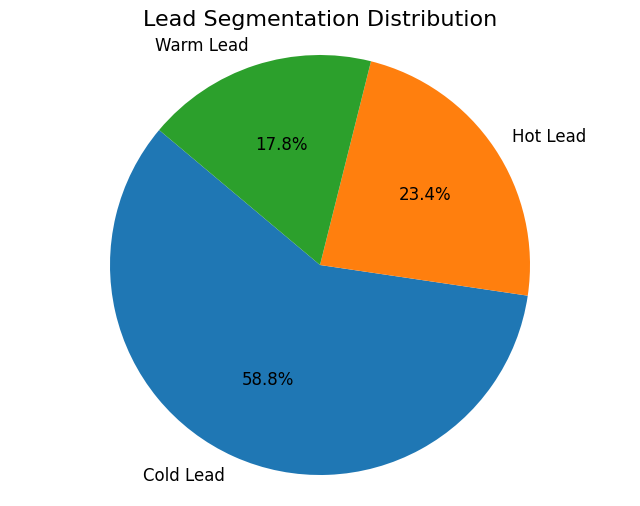

In [35]:
# Generate lead categories dynamically
lead_counts = leads_df['Lead Category'].value_counts()

# Extract labels and sizes from the lead_counts
labels = lead_counts.index
sizes = lead_counts.values

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Lead Segmentation Distribution', fontsize=16)
plt.axis('equal')
plt.show()
